In [2]:
# Load the standard Python data science packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
# Create variable for the name of the file containing the Auto data set
auto_filename = "C:/Users/bikmi/Desktop/Bigdata HW/Auto.csv"
# Load the Auto data set into a Pandas dataframe, treating question marks as na values
auto = pd.read_csv(auto_filename, na_values = ["?"])
# Drop the rows which contain missing values (safe to do since we've worked with this data in a previous lab)
auto.dropna(inplace = True)
# Check the dimensions of the dataframe
auto.shape

(392, 9)

Find predictors which are quantitative or qualitative.

In [4]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


The quantitative variables are mpg, displacement, horsepower, weight, and acceleration. Depending on the context, I want to treat cylinders and year as quantitative predictors or qualitative ones. Lastly, origin and name are qualitative predictors. origin is a quantitative encoding of a car's country of origin, where 1 being American, 2 being European, and 3 being Japanese.

Mean and standard deviation of each quantitative predictor

In [6]:
# Compute mean of each quantitative variable
auto_mean = auto.loc[:, "mpg":"year"].mean(axis = 0)
# Compute standard deviation of each quantitative variable
auto_sd = auto.loc[:, "mpg":"year"].std(axis = 0)
# Generate a dataframe with the mean and standard deviation of each quantitative predictor
# Note that I also could have used the describe() function as well
pd.DataFrame({"mean":auto_mean, "std dev":auto_sd})

,mean,std dev
mpg,23.445918,7.805007
cylinders,5.471939,1.705783
displacement,194.411990,104.644004
horsepower,104.469388,38.491160
weight,2977.584184,849.402560
acceleration,15.541327,2.758864
year,75.979592,3.683737


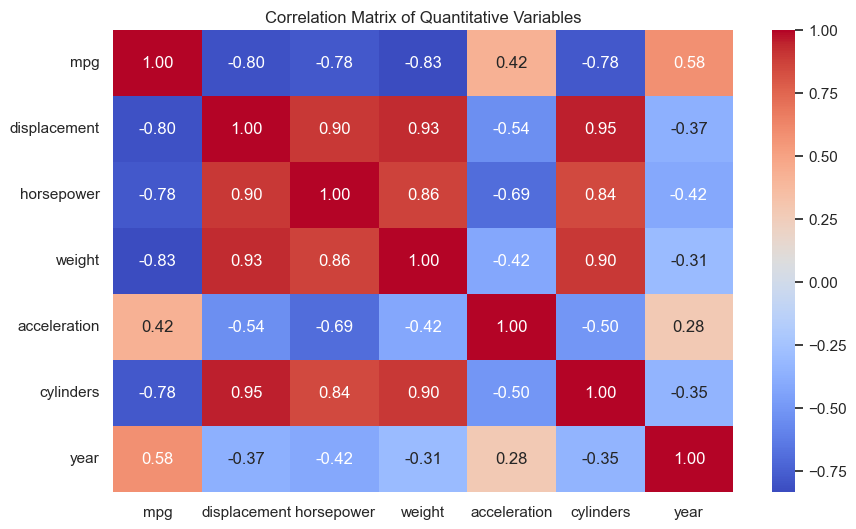

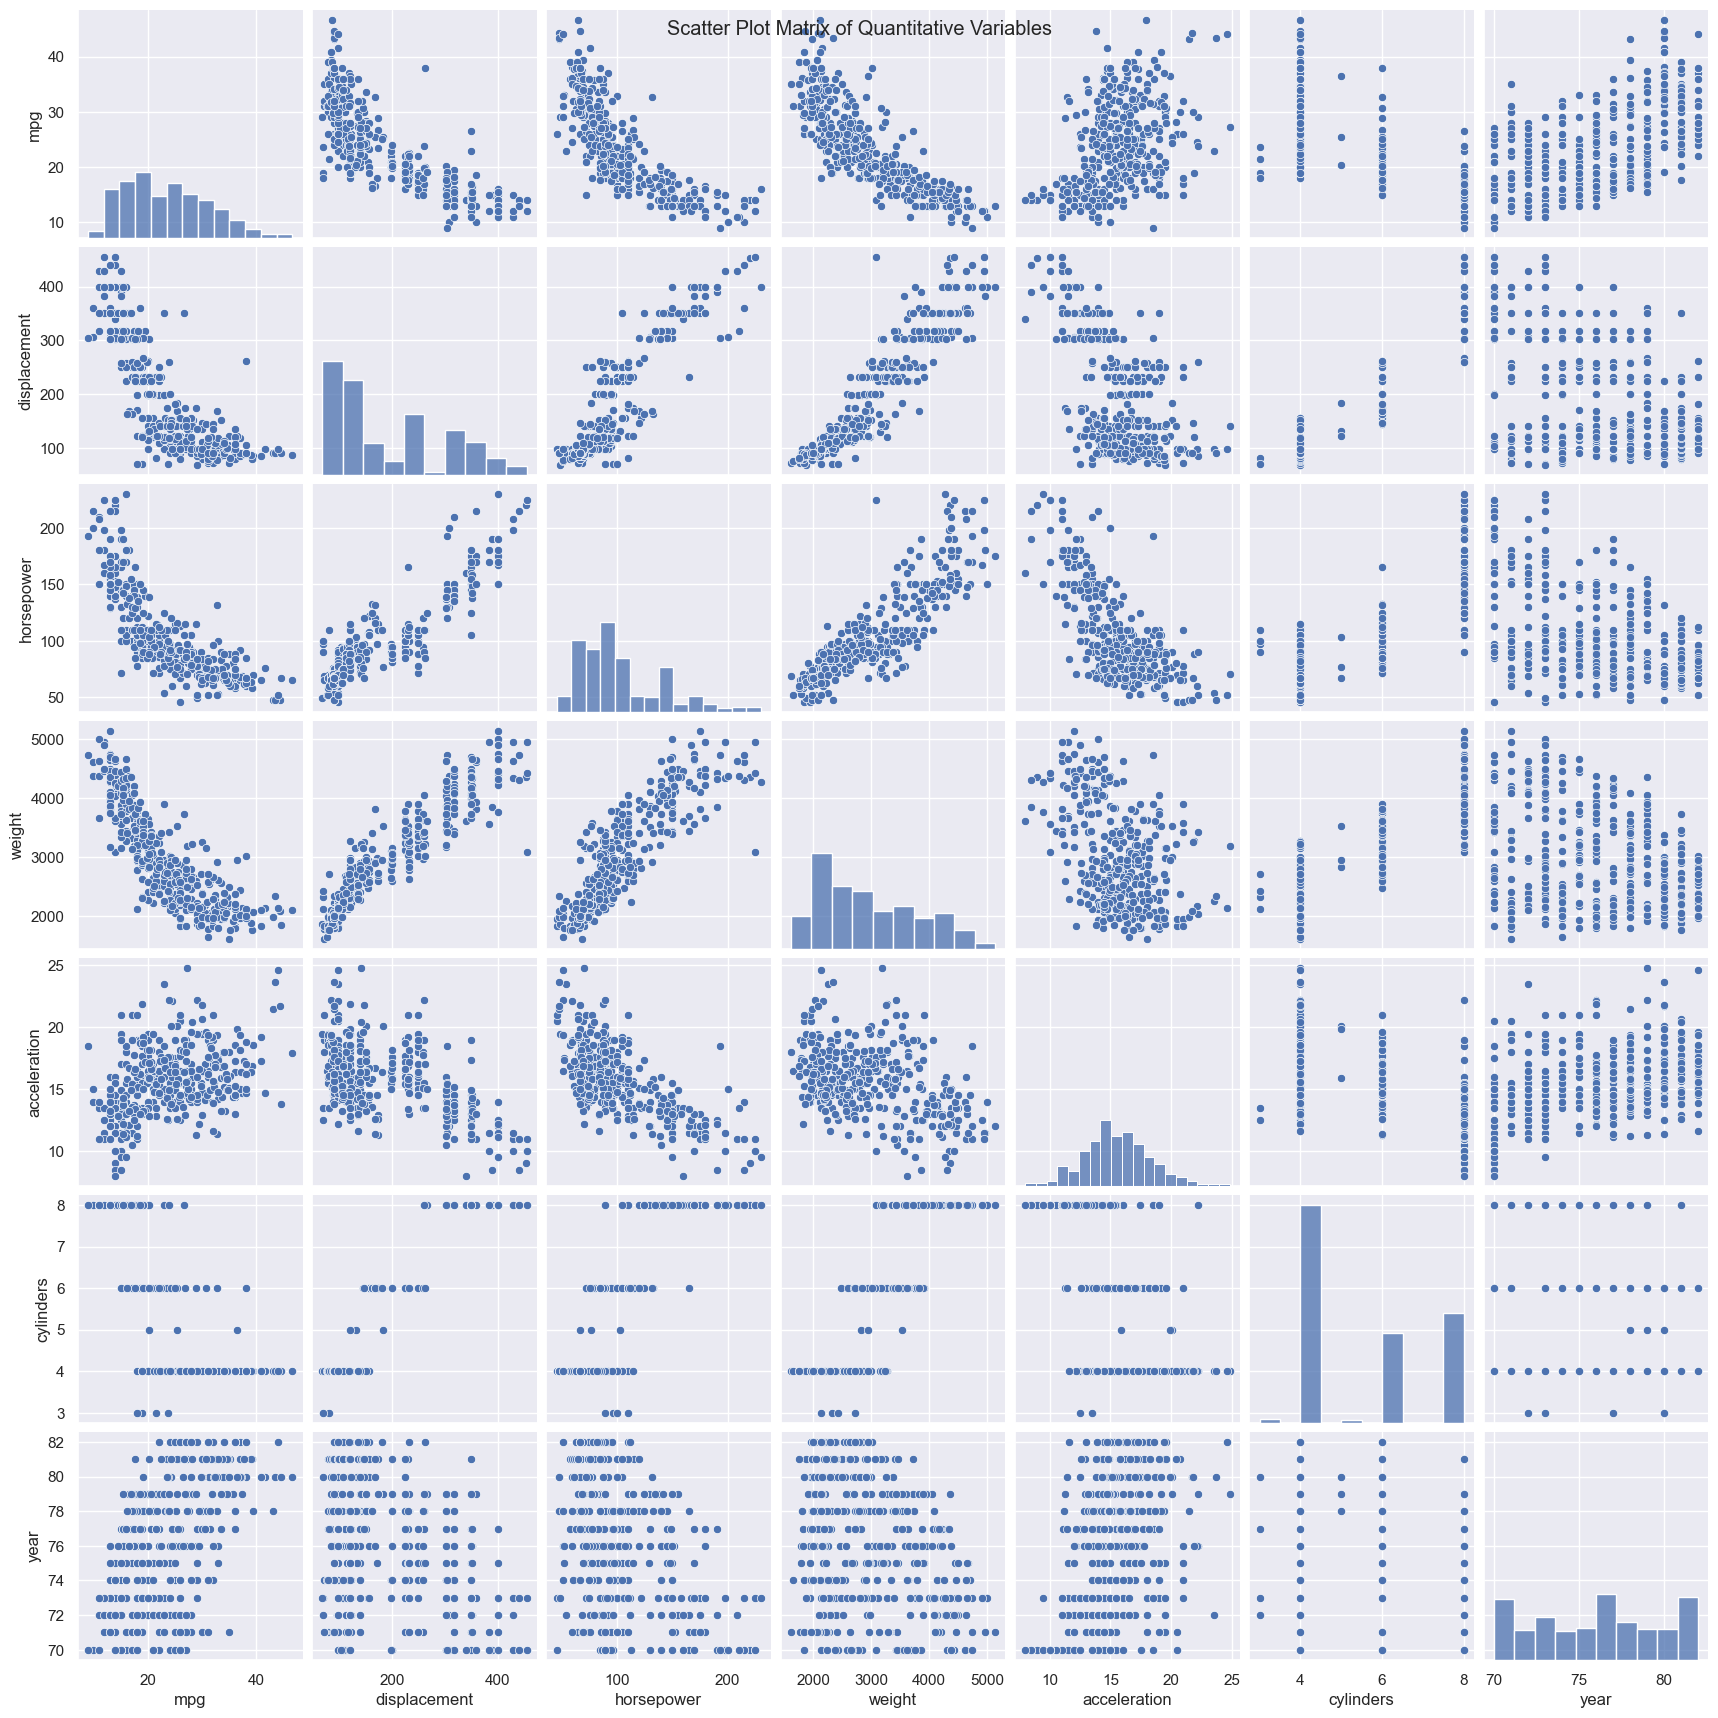

In [7]:
# Step 1: Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the dataset (if not already loaded)
file_path = 'C:/Users/bikmi/Desktop/Bigdata HW/Auto.csv'  # Replace with the correct file path
df = pd.read_csv(file_path)

# Step 3: Convert 'horsepower' to numeric (in case it has missing or non-numeric values)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Step 4: Filter the quantitative variables
quantitative_vars = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'cylinders', 'year']

# Step 5: Check the correlation matrix of the quantitative variables
correlation_matrix = df[quantitative_vars].corr()

# Step 6: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Quantitative Variables')
plt.show()

# Step 7: Produce scatter plots for the quantitative variables
sns.pairplot(df[quantitative_vars])
plt.suptitle('Scatter Plot Matrix of Quantitative Variables')
plt.show()


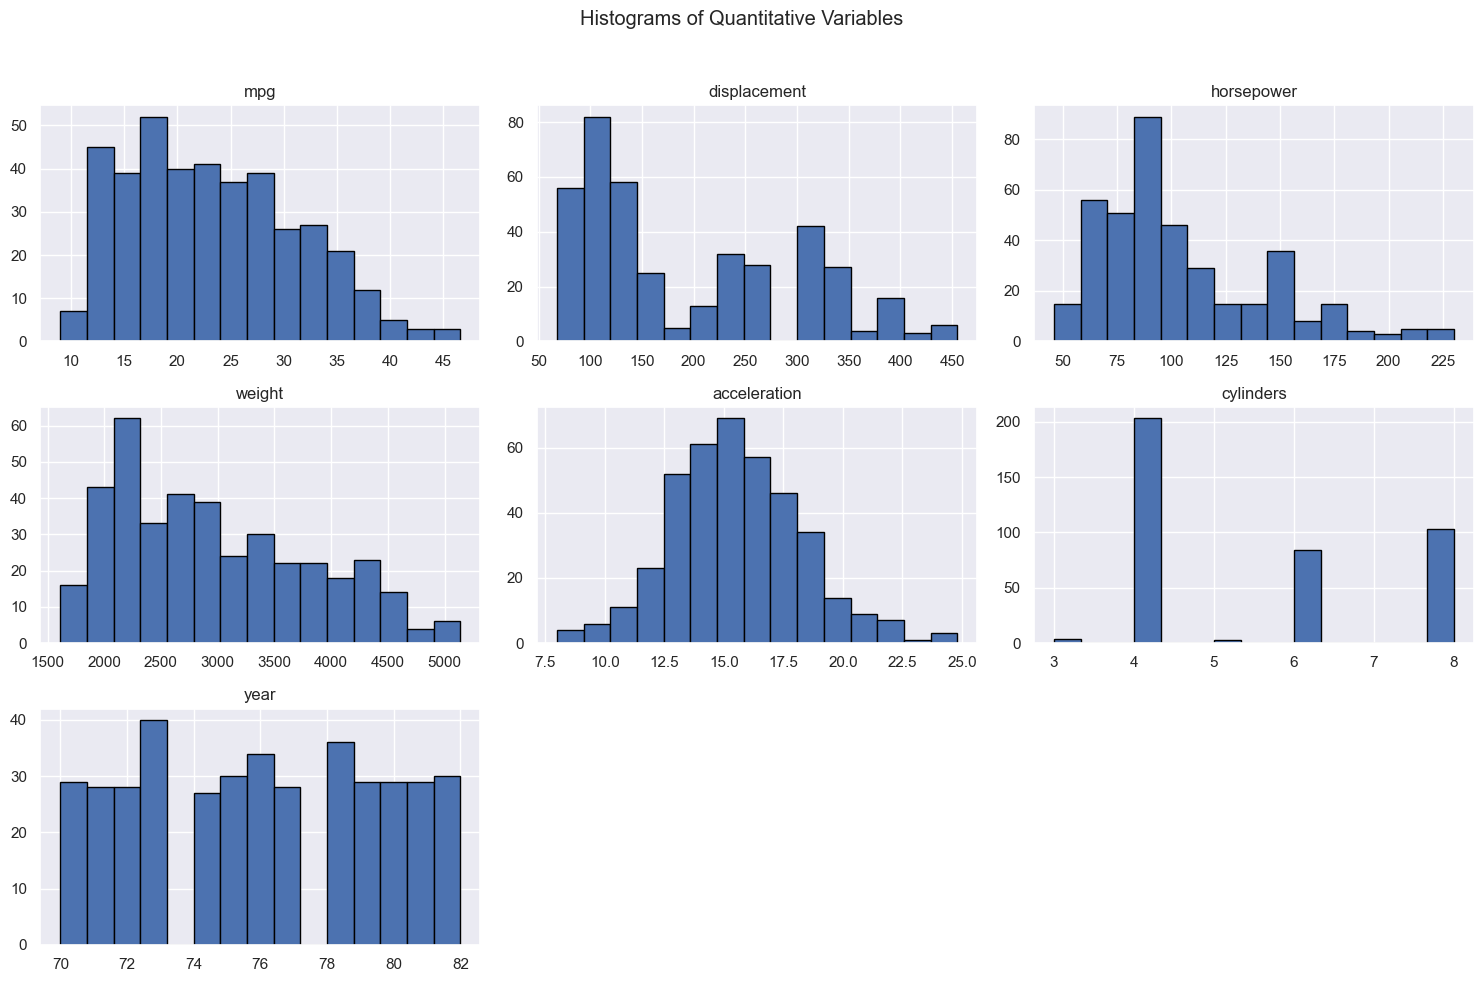

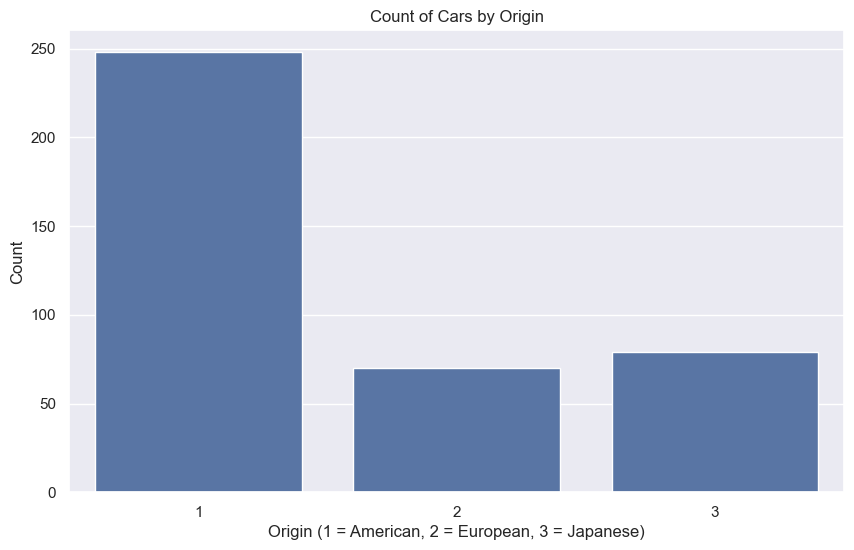

In [8]:
# Step 1: Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the dataset (if not already loaded)
file_path = 'Auto.csv'  # Replace with the correct file path
df = pd.read_csv(file_path)

# Step 3: Convert 'horsepower' to numeric (in case it has missing or non-numeric values)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Step 4: Filter quantitative and qualitative variables
quantitative_vars = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'cylinders', 'year']
qualitative_vars = ['origin']  # 'name' is unique, so it's not meaningful to visualize

# Step 5: Provide a graph for quantitative variables (histograms)
df[quantitative_vars].hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Quantitative Variables')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent overlap
plt.show()

# Step 6: Provide a graph for qualitative variables (bar plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='origin', data=df)
plt.title('Count of Cars by Origin')
plt.xlabel('Origin (1 = American, 2 = European, 3 = Japanese)')
plt.ylabel('Count')
plt.show()


In [10]:
# Convert the origin column from numerical codes to the meanings of each code
# 1 = American, 2 = European, 3 = Japanese
origin_dict = {1: "American", 2: "European", 3: "Japanese"}
auto["origin"] = auto["origin"].transform(lambda x: origin_dict[x]).astype("category")

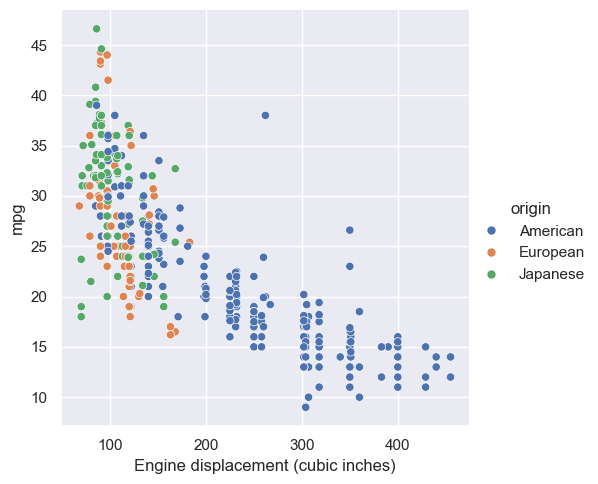

In [11]:
# Create scatter plot for the relationship between engine displacement and mpg
# Use hue to highlight the origin of each car
g = sns.relplot(x = "displacement", y = "mpg", hue = "origin", data = auto)
g.set(xlabel = "Engine displacement (cubic inches)")
plt.show()

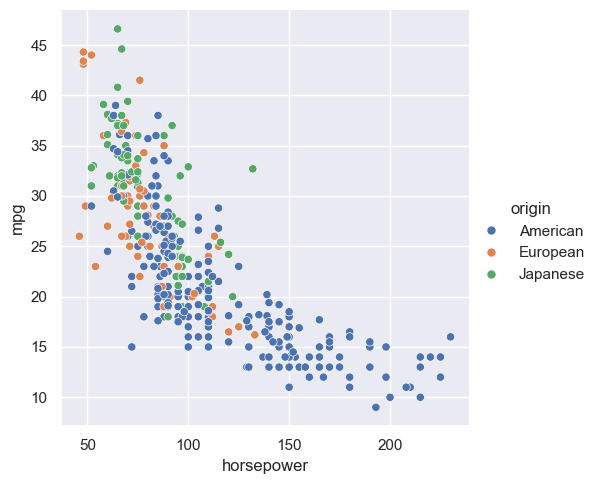

In [12]:
# Create scatter plot for the relationship between horsepower and mpg
# Use hue to highlight the origin of each car
g = sns.relplot(x = "horsepower", y = "mpg", hue = "origin", data = auto)
plt.show()

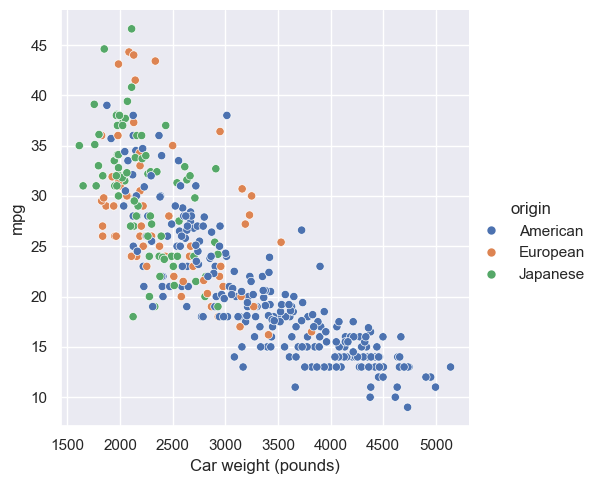

In [13]:
# Create scatter plot for the relationship between car weight and mpg
# Use hue to highlight the origin of each car
g = sns.relplot(x = "weight", y = "mpg", hue = "origin", data = auto)
g.set(xlabel = "Car weight (pounds)")
plt.show()

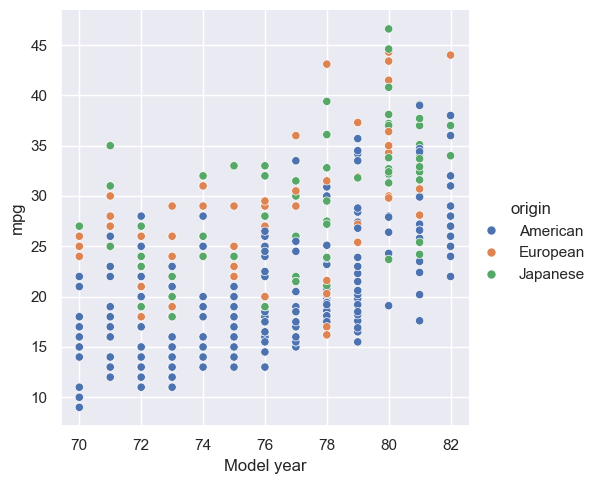

In [14]:
# Create scatter plot for the relationship between model year and mpg
# Use hue to highlight the origin of each car
g = sns.relplot(x = "year", y = "mpg", hue = "origin", data = auto)
g.set(xlabel = "Model year")
plt.show()

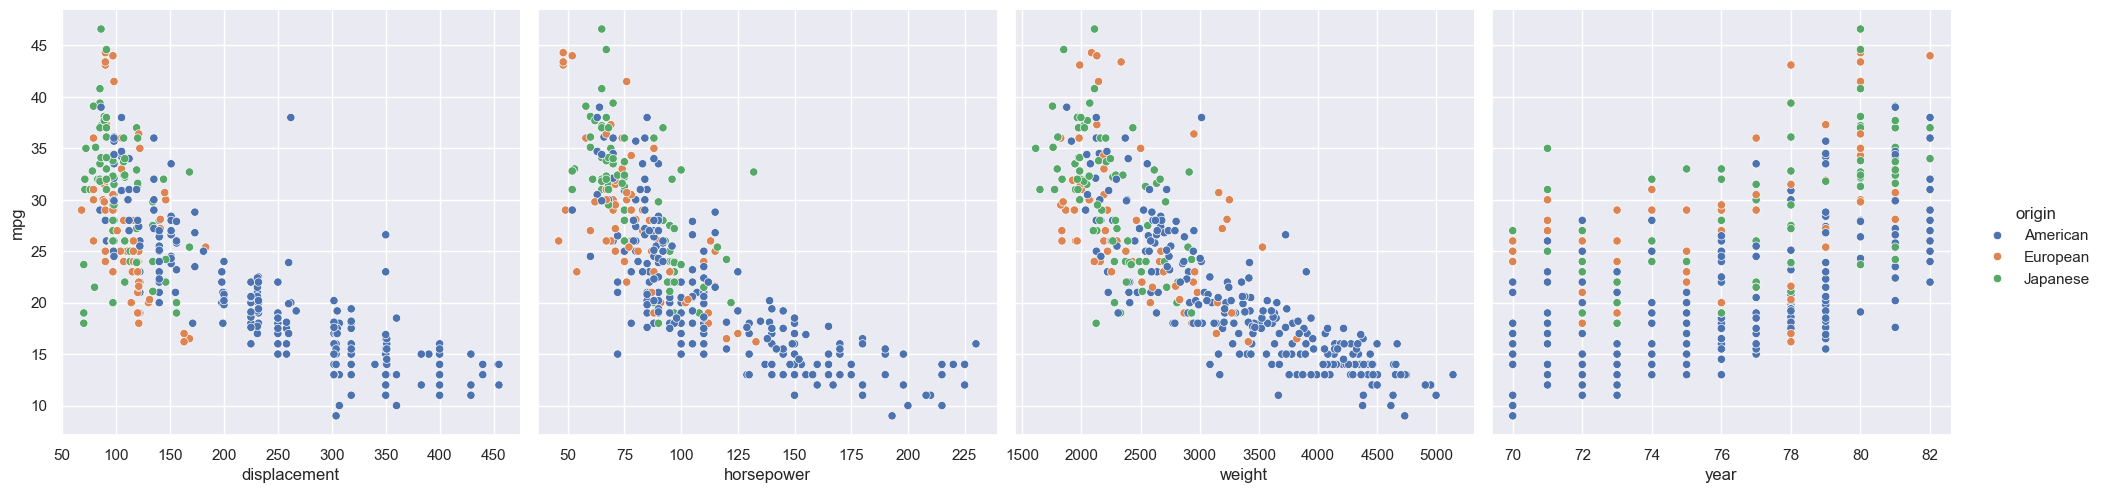

In [16]:
# Alternatively use pairplot to create scatterplots relating mpg to engine displacement, horsepower,
# car weight, and car manufacture year
# Use hue to highlight the origin of each car
g = sns.pairplot(auto, hue = "origin", y_vars = ["mpg"], x_vars = ["displacement", "horsepower", "weight", "year"],
                height = 5)

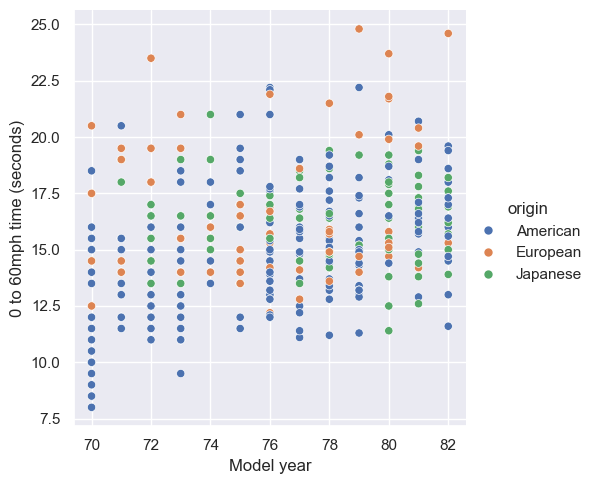

In [17]:
# Create scatter plot for the relationship between model year and acceleration
# Use hue to highlight the origin of each car
g = sns.relplot(x = "year", y = "acceleration", hue = "origin", data = auto)
g.set(xlabel = "Model year", ylabel = "0 to 60mph time (seconds)")
plt.show()

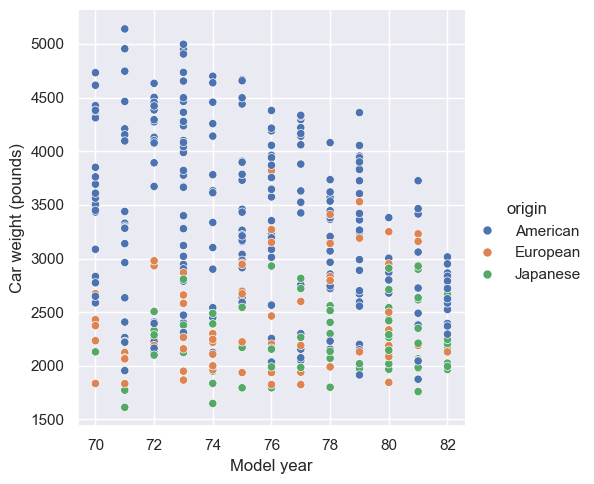

In [18]:
# Create scatter plot for the relationship between model year and car weight
# Use hue to highlight the origin of each car
g = sns.relplot(x = "year", y = "weight", hue = "origin", data = auto)
g.set(xlabel = "Model year", ylabel = "Car weight (pounds)")
plt.show()

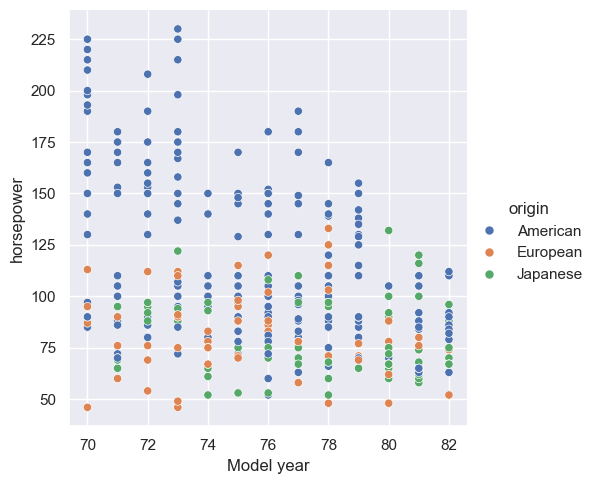

In [19]:
# Create scatter plot for the relationship between model year and horsepower
# Use hue to highlight the origin of each car
g = sns.relplot(x = "year", y = "horsepower", hue = "origin", data = auto)
g.set(xlabel = "Model year", ylabel = "horsepower")
plt.show()

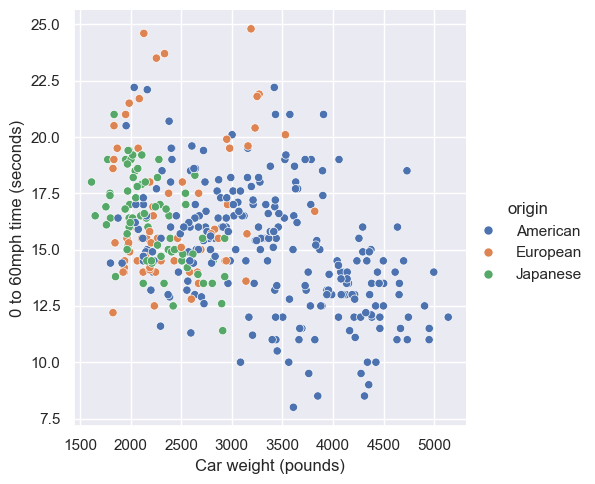

In [20]:
# Create scatter plot for the relationship between car weight and acceleration
# Use hue to highlight the origin of each car
g = sns.relplot(x = "weight", y = "acceleration", hue = "origin", data = auto)
g.set(xlabel = "Car weight (pounds)", ylabel = "0 to 60mph time (seconds)")
plt.show()

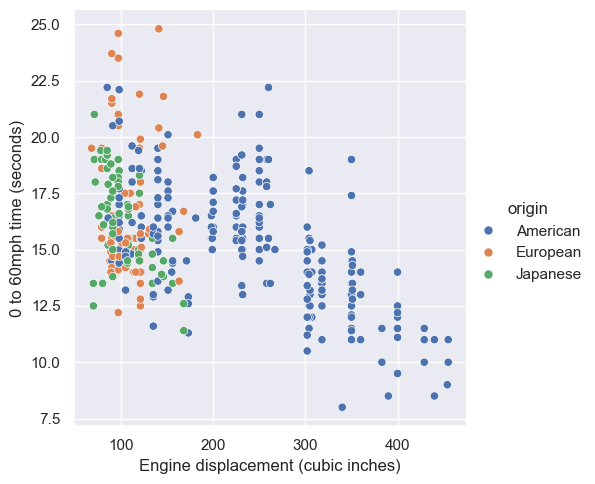

In [21]:
# Create scatter plot for the relationship between engine displacement and acceleration
# Use hue to highlight the origin of each car
g = sns.relplot(x = "displacement", y = "acceleration", hue = "origin", data = auto)
g.set(xlabel = "Engine displacement (cubic inches)", ylabel = "0 to 60mph time (seconds)")
plt.show()

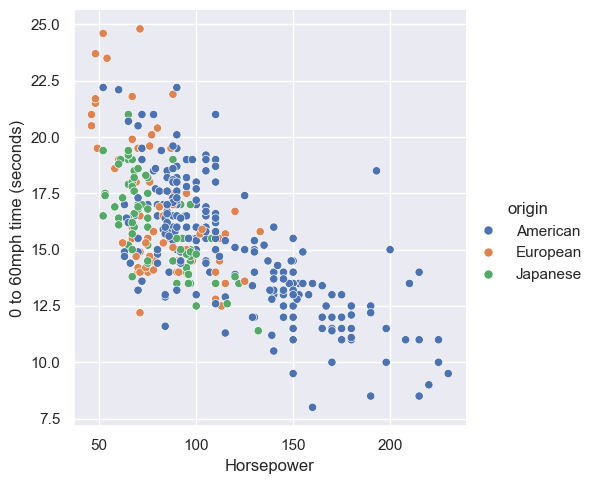

In [22]:
# Create scatter plot for the relationship between horsepower and acceleration
# Use hue to highlight the origin of each car
g = sns.relplot(x = "horsepower", y = "acceleration", hue = "origin", data = auto)
g.set(xlabel = "Horsepower", ylabel = "0 to 60mph time (seconds)")
plt.show()

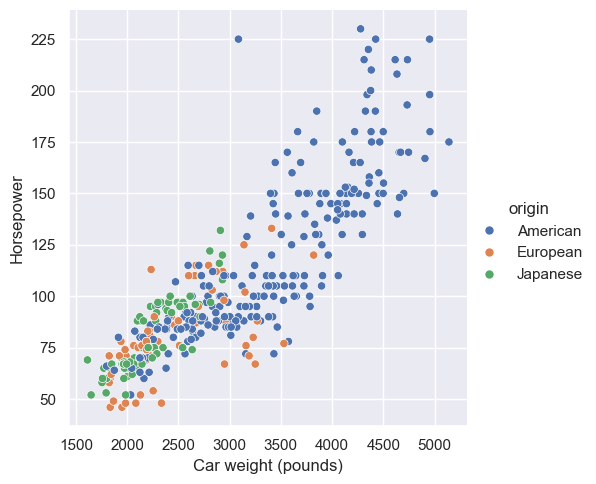

In [24]:
# Create scatter plot for the relationship between car weight and horsepower
# Use hue to highlight the origin of each car
g = sns.relplot(x = "weight", y = "horsepower", hue = "origin", data = auto)
g.set(xlabel = "Car weight (pounds)", ylabel = "Horsepower")
plt.show()

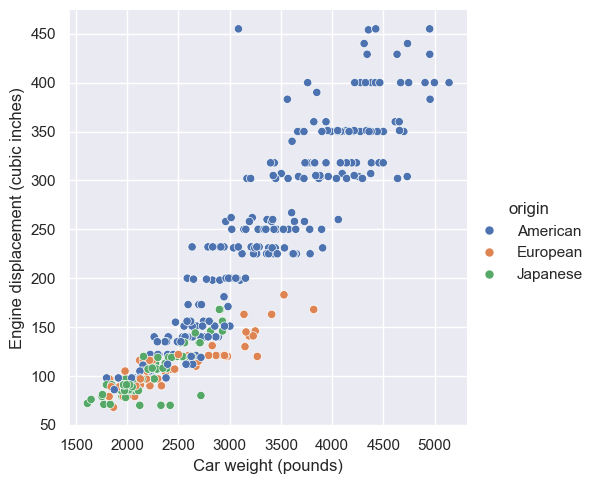

In [25]:
# Create scatter plot for the relationship between car weight and engine displacement
# Use hue to highlight the origin of each car
g = sns.relplot(x = "weight", y = "displacement", hue = "origin", data = auto)
g.set(xlabel = "Car weight (pounds)", ylabel = "Engine displacement (cubic inches)")
plt.show()